# 1. Imports

In [6]:
!kaggle competitions download -c titanic
!unzip titanic.zip -d ./titanic
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')
!rm titanic.zip
!rm -rf titanic/

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 2.95MB/s]
Archive:  titanic.zip
  inflating: ./titanic/gender_submission.csv  
  inflating: ./titanic/test.csv      
  inflating: ./titanic/train.csv     


# 2. DATA

In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 455kB/s]
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 455kB/s]


In [2]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
df_submission = pd.read_csv("sample_submission.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
!rm sample_submission.csv
!rm train.csv
!rm test.csv
!rm data_description.txt
!rm house-prices-advanced-regression-techniques.zip

In [8]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

# 3. 적합

In [9]:
# step1 -- pass
# step2
predictr = TabularPredictor(label='SalePrice')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)
yyhat = predictr.predict(df_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20231205_015405/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231205_015405/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1483.35 GB / 1887.51 GB (78.6%)
Train Data Rows:    1460
Train Data Columns: 80
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 180921.19589, 79442.50288)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeat

[1000]	valid_set's rmse: 27505.1
[2000]	valid_set's rmse: 27240.4
[3000]	valid_set's rmse: 27201.5
[4000]	valid_set's rmse: 27197.3
[5000]	valid_set's rmse: 27197.2


	-27196.7065	 = Validation score   (-root_mean_squared_error)
	30.2s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 29499.8
[2000]	valid_set's rmse: 28896.4
[3000]	valid_set's rmse: 28752.1
[4000]	valid_set's rmse: 28705.7
[5000]	valid_set's rmse: 28695.2
[6000]	valid_set's rmse: 28693
[7000]	valid_set's rmse: 28692.5
[8000]	valid_set's rmse: 28692.3
[9000]	valid_set's rmse: 28692.3
[10000]	valid_set's rmse: 28692.3


	-28692.2871	 = Validation score   (-root_mean_squared_error)
	58.13s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-32785.3519	 = Validation score   (-root_mean_squared_error)
	0.47s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-28465.6966	 = Validation score   (-root_mean_squared_error)
	527.39s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-32045.9062	 = Validation score   (-root_mean_squared_error)
	0.43s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-34153.0602	 = Validation score   (-root_mean_squared_error)
	4.23s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost ...
	-27778.2437	 = Validation score   (-root_mean_squared_error)
	1.2s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-35377.6354	 = Validation score   (-root_mean_squared_error)
	8.63s	 = Training   run

[1000]	valid_set's rmse: 32134.9
[2000]	valid_set's rmse: 32087.8
[3000]	valid_set's rmse: 32084.2
[4000]	valid_set's rmse: 32084.2
[5000]	valid_set's rmse: 32084.2


	-32084.1712	 = Validation score   (-root_mean_squared_error)
	108.86s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-26322.571	 = Validation score   (-root_mean_squared_error)
	0.25s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 741.44s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20231205_015405/")


# 5. 해석 및 시각화 

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
SalePrice,1460,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0,int64,663,,,int,


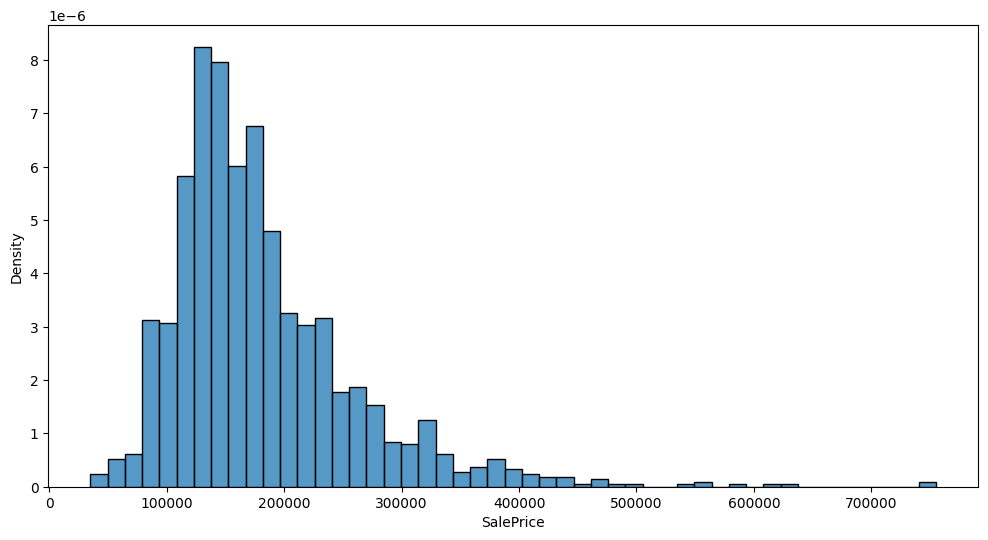

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `SalePrice` >= `0.5`**

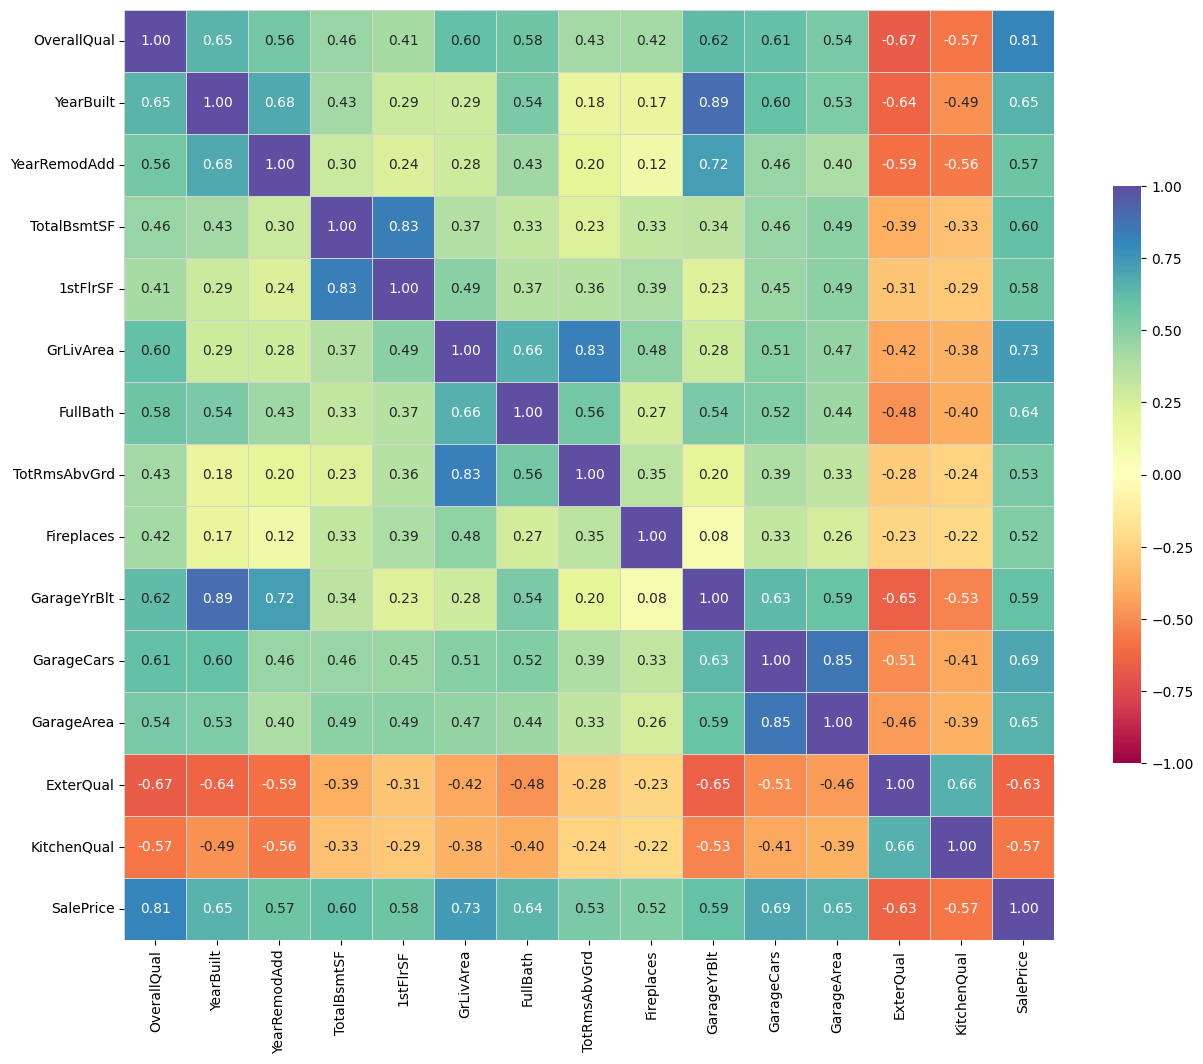

**Feature interaction between `OverallQual`/`SalePrice` in `train_data`**

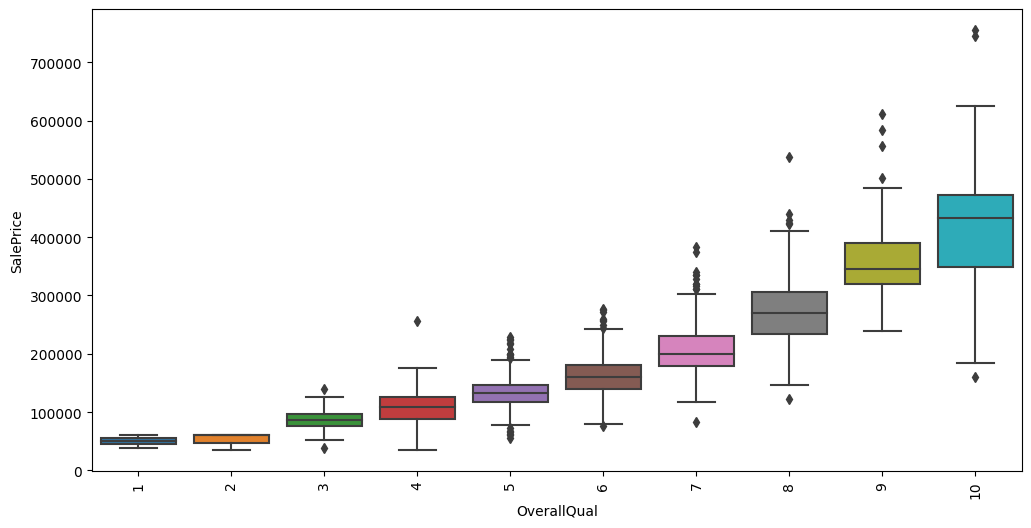

**Feature interaction between `GrLivArea`/`SalePrice` in `train_data`**

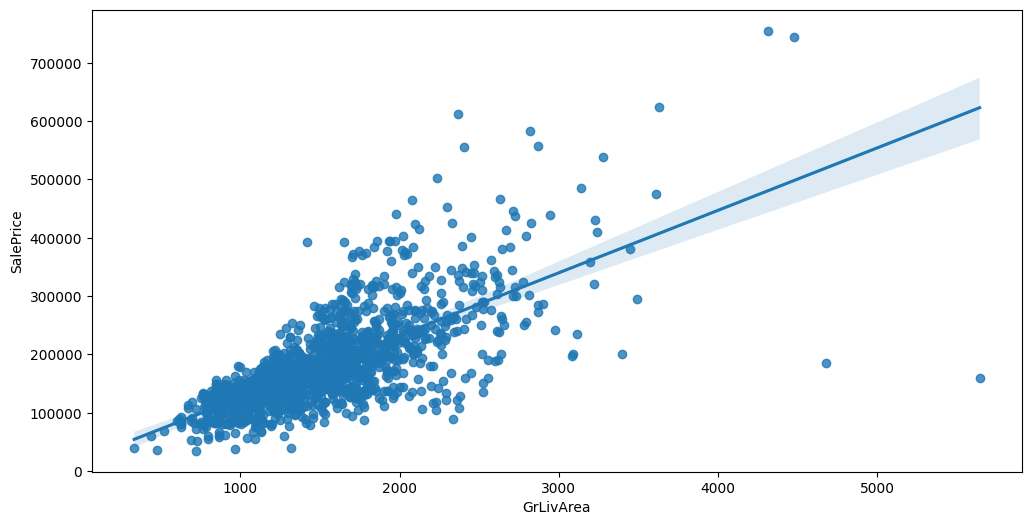

**Feature interaction between `GarageCars`/`SalePrice` in `train_data`**

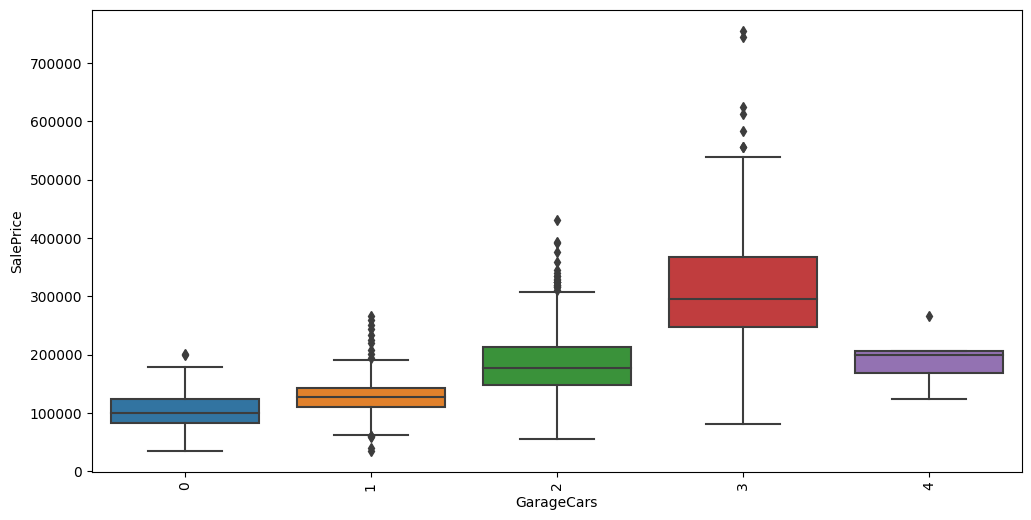

**Feature interaction between `YearBuilt`/`SalePrice` in `train_data`**

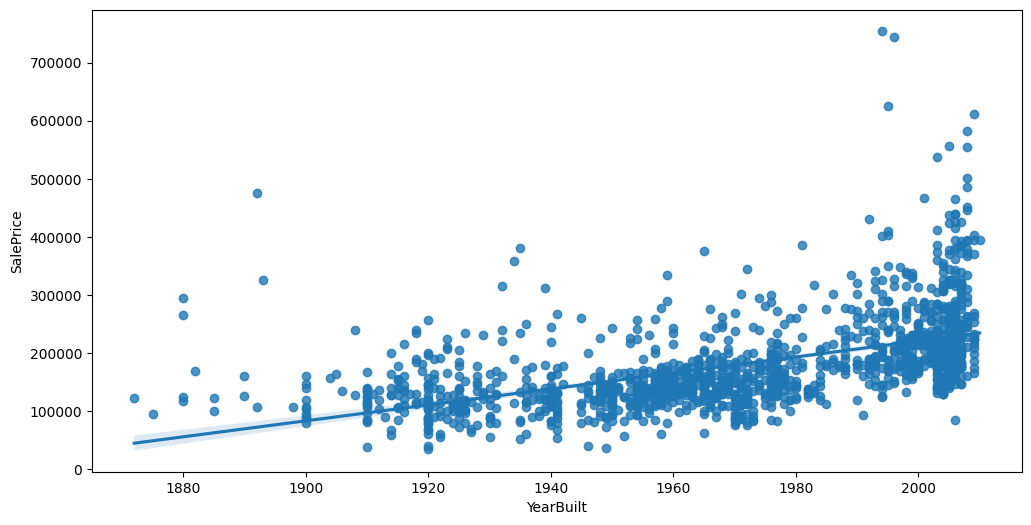

**Feature interaction between `GarageArea`/`SalePrice` in `train_data`**

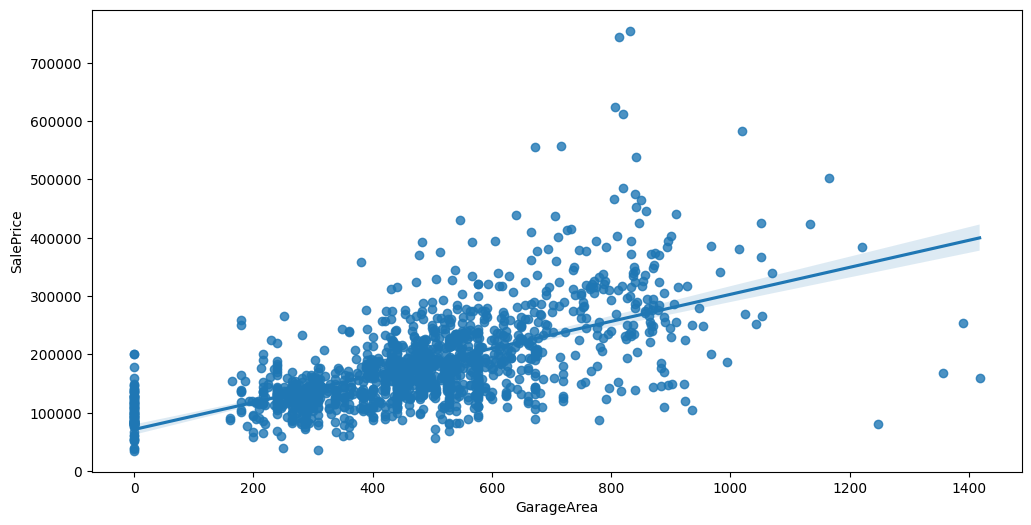

**Feature interaction between `FullBath`/`SalePrice` in `train_data`**

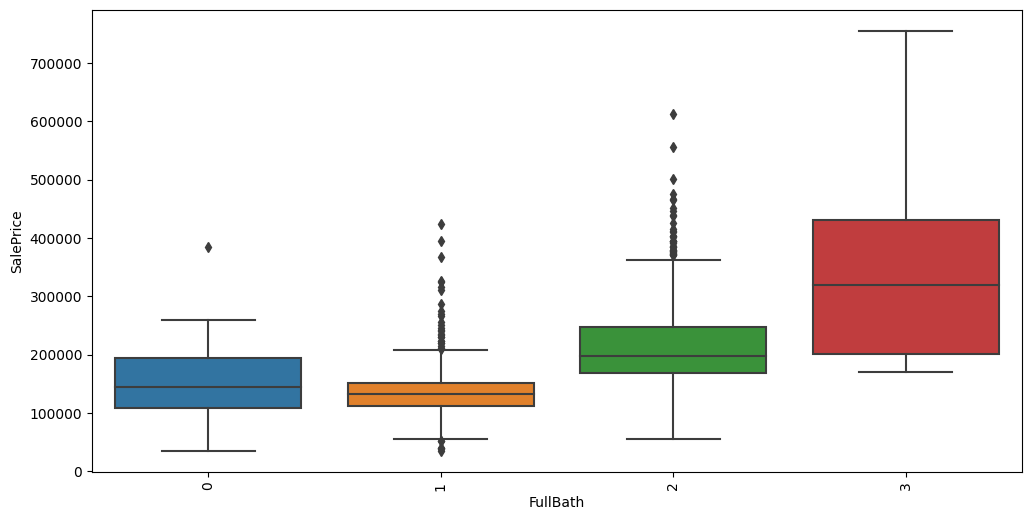

**Feature interaction between `TotalBsmtSF`/`SalePrice` in `train_data`**

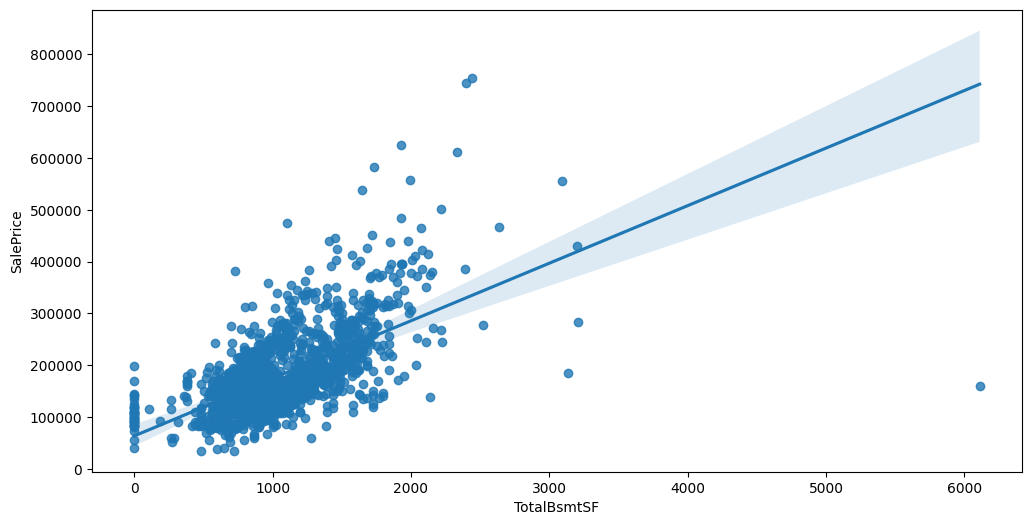

**Feature interaction between `GarageYrBlt`/`SalePrice` in `train_data`**

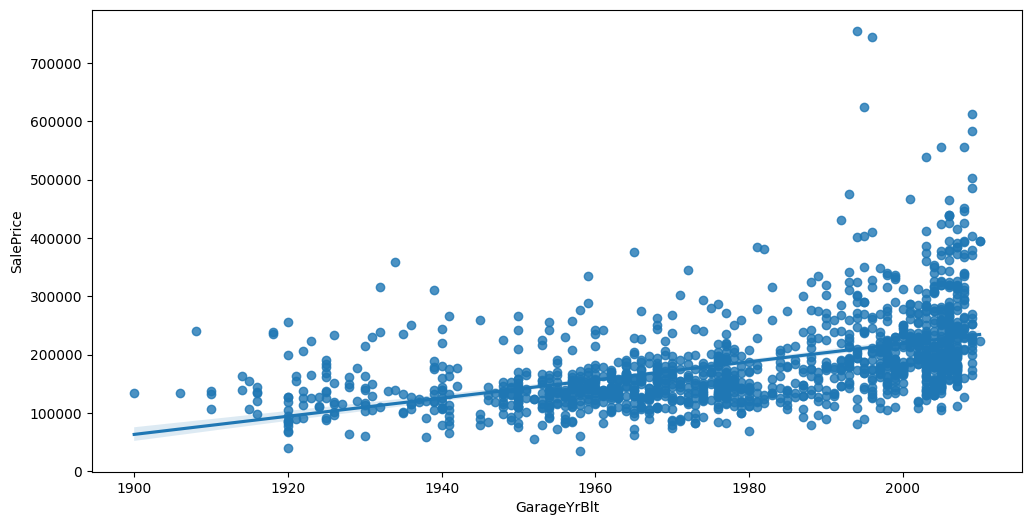

**Feature interaction between `1stFlrSF`/`SalePrice` in `train_data`**

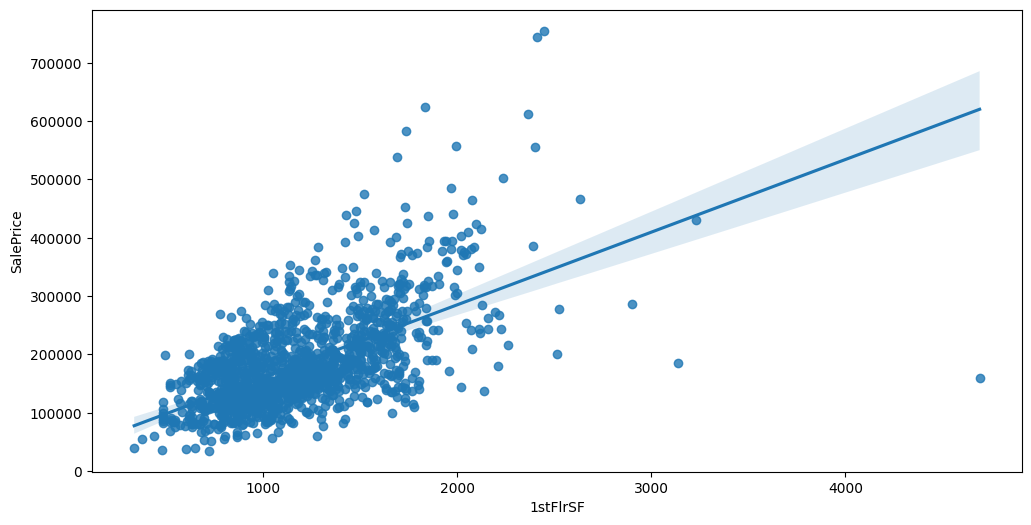

**Feature interaction between `YearRemodAdd`/`SalePrice` in `train_data`**

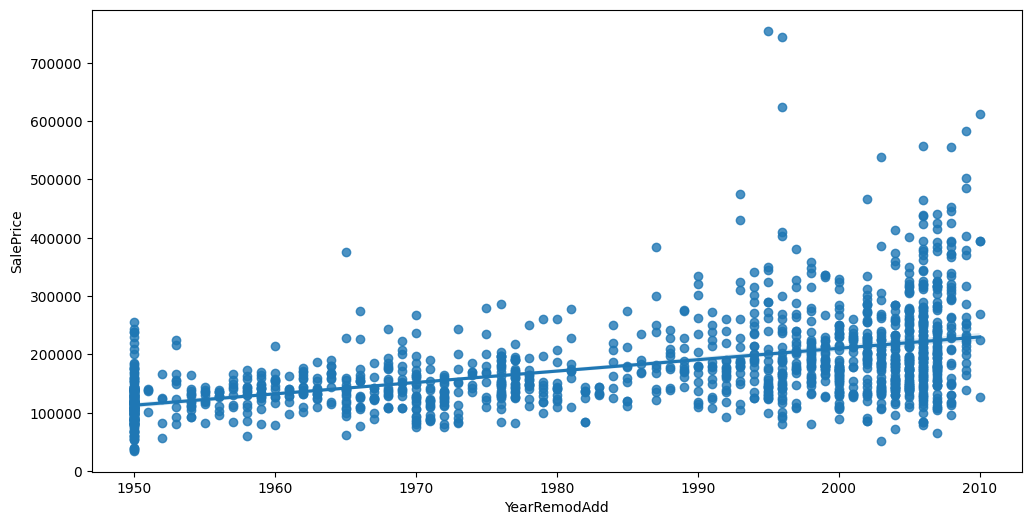

**Feature interaction between `TotRmsAbvGrd`/`SalePrice` in `train_data`**

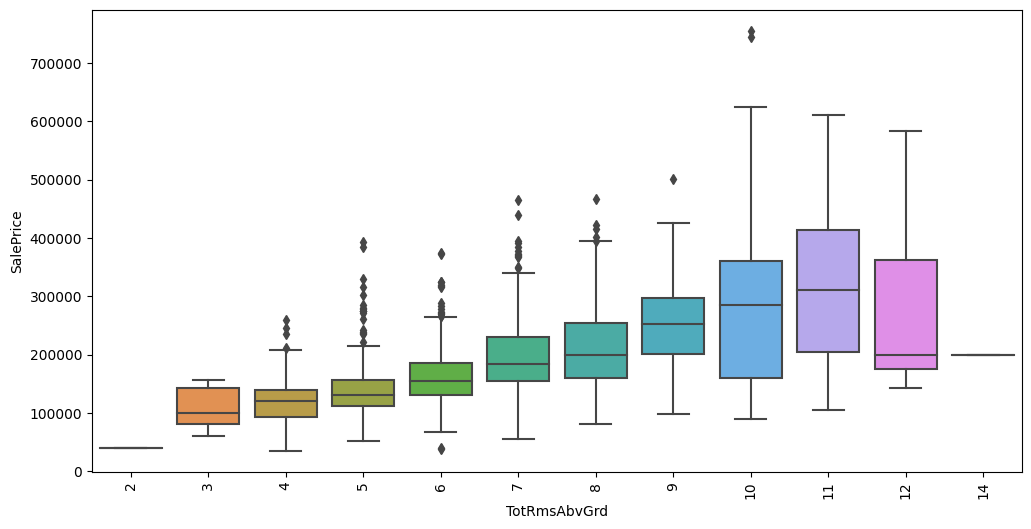

**Feature interaction between `Fireplaces`/`SalePrice` in `train_data`**

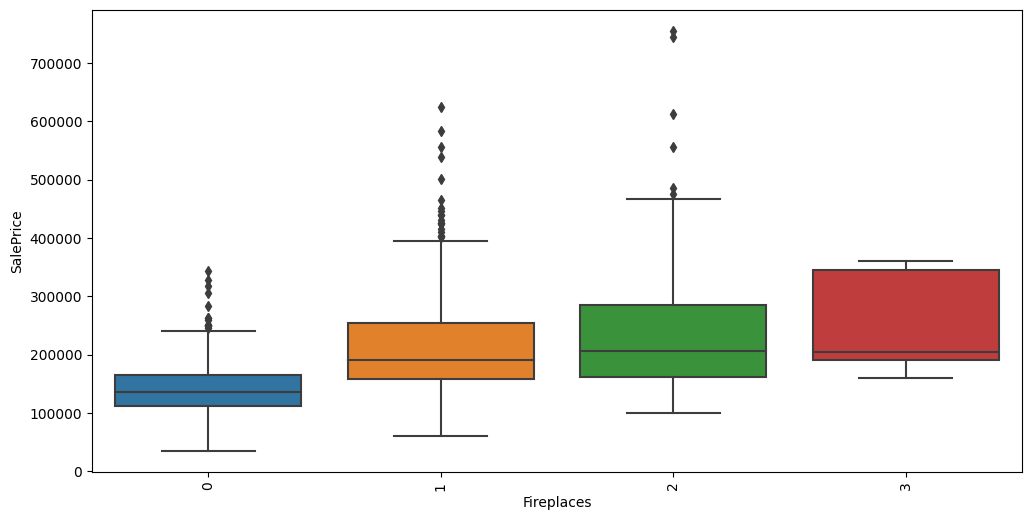

**Feature interaction between `KitchenQual`/`SalePrice` in `train_data`**

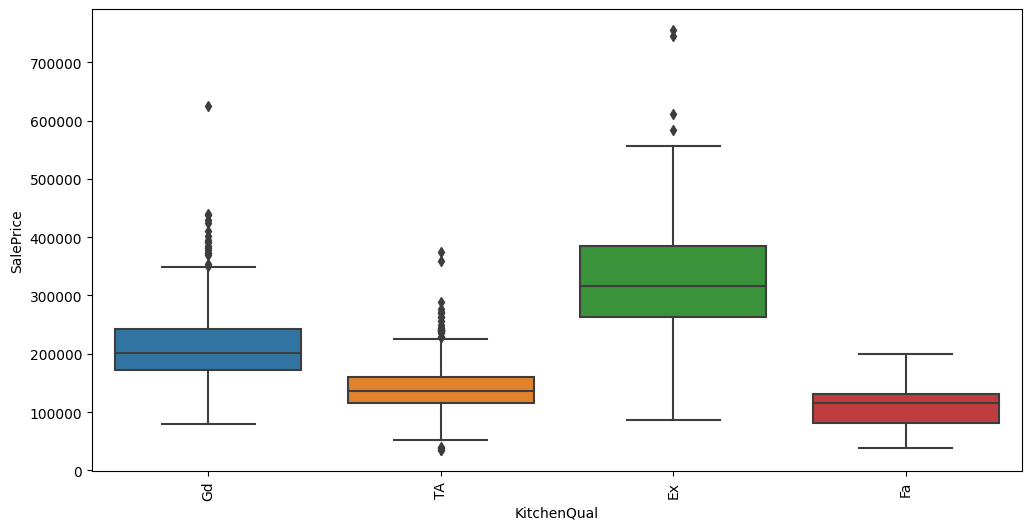

**Feature interaction between `ExterQual`/`SalePrice` in `train_data`**

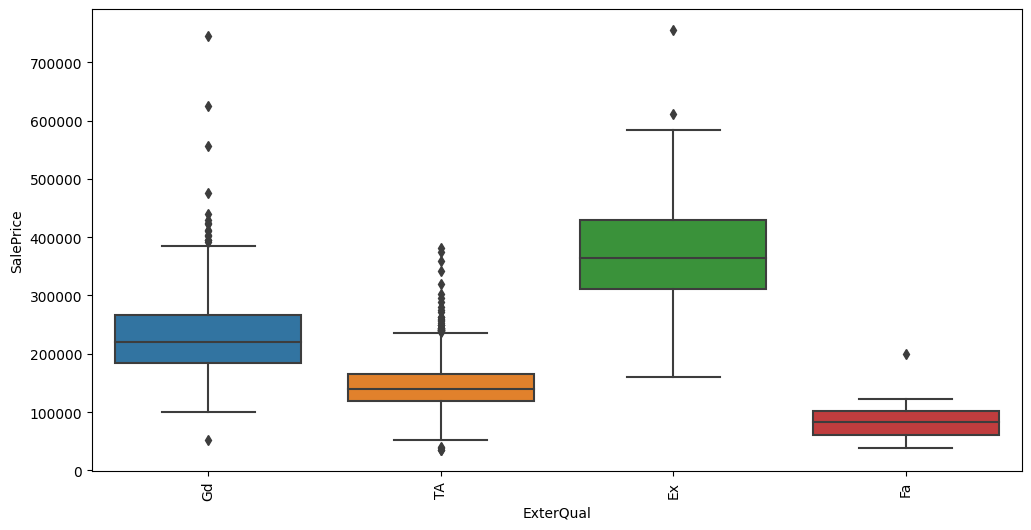

In [10]:
auto.target_analysis(
    train_data=df_train,
    label='SalePrice',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231205_020903/"


### Model Prediction for SalePrice

Using validation data for `Test` points

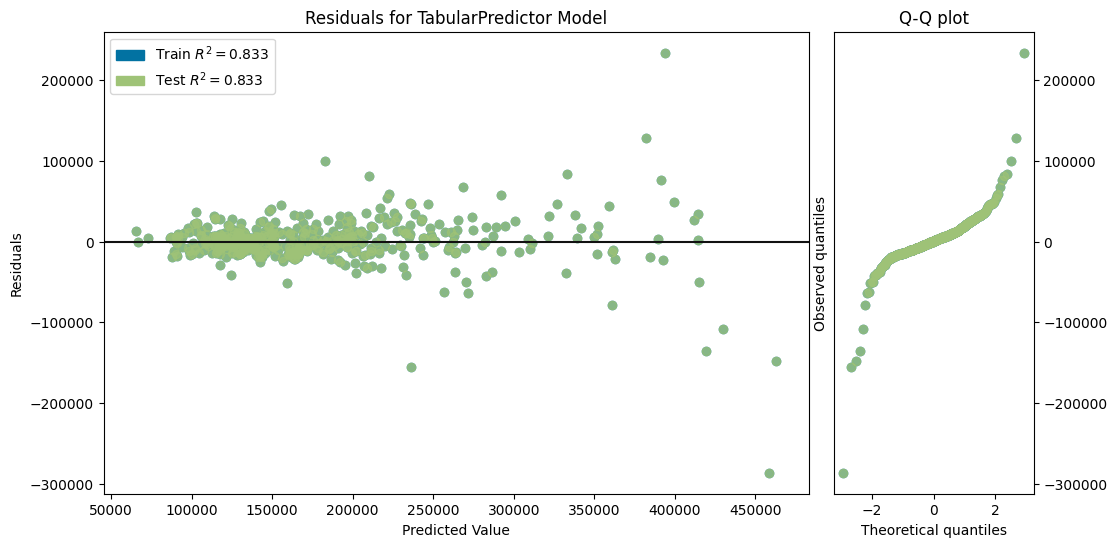

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-30529.412291,-32535.182194,0.014,0.013309,2.212614,0.014,0.013309,2.212614,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
OverallQual,11716.915326,705.955990,1.573763e-06,5,13170.488468,10263.342185
GrLivArea,6071.089919,394.407430,2.125470e-06,5,6883.180269,5258.999569
GarageCars,3209.379857,372.418575,2.137296e-05,5,3976.194851,2442.564863
BsmtFinSF1,2719.389615,125.895615,5.496647e-07,5,2978.610426,2460.168805
TotalBsmtSF,2187.752068,328.342663,5.909712e-05,5,2863.814149,1511.689987
1stFlrSF,1688.228494,248.951746,5.513520e-05,5,2200.823579,1175.633408
Neighborhood,1534.658374,377.814804,4.073284e-04,5,2312.584278,756.732471
HalfBath,881.236830,353.675558,2.542584e-03,5,1609.459692,153.013968
2ndFlrSF,872.631138,123.229525,4.647906e-05,5,1126.362433,618.899844
Fireplaces,868.173697,364.469844,2.989959e-03,5,1618.622144,117.725249


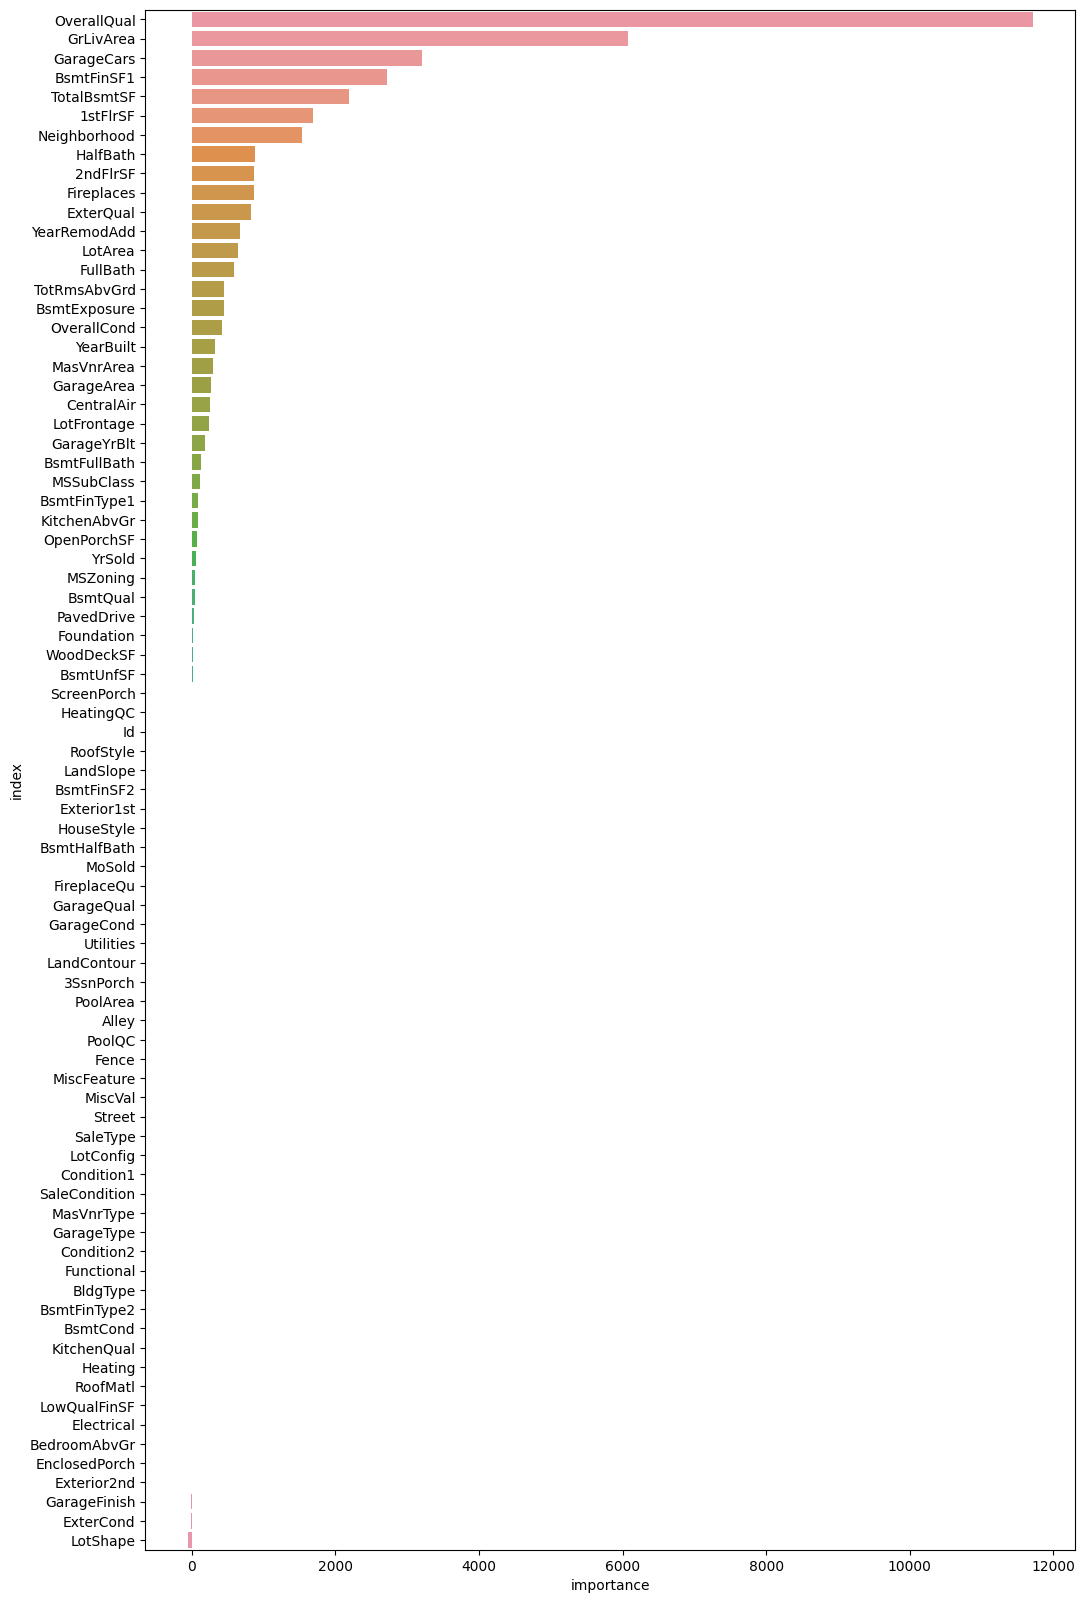

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_pred,error
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,458492.125000,286507.875000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,394141.625000,234141.625000
688,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,0,10,2007,New,Partial,392000,236151.000000,155849.000000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,3,2010,New,Partial,611657,463175.906250,148481.093750
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2009,WD,Normal,555000,419354.593750,135645.406250
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2009,New,Partial,253293,382104.968750,128811.968750
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,538000,429698.281250,108301.718750
632,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2009,WD,Family,82500,182936.734375,100436.734375
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,333203.062500,83203.062500
666,667,60,RL,NaN,18450,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Abnorml,129000,210298.609375,81298.609375


In [11]:
auto.quick_fit(
    train_data=df_train,
    label='SalePrice',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석 

In [12]:
df_train.iloc[[1]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


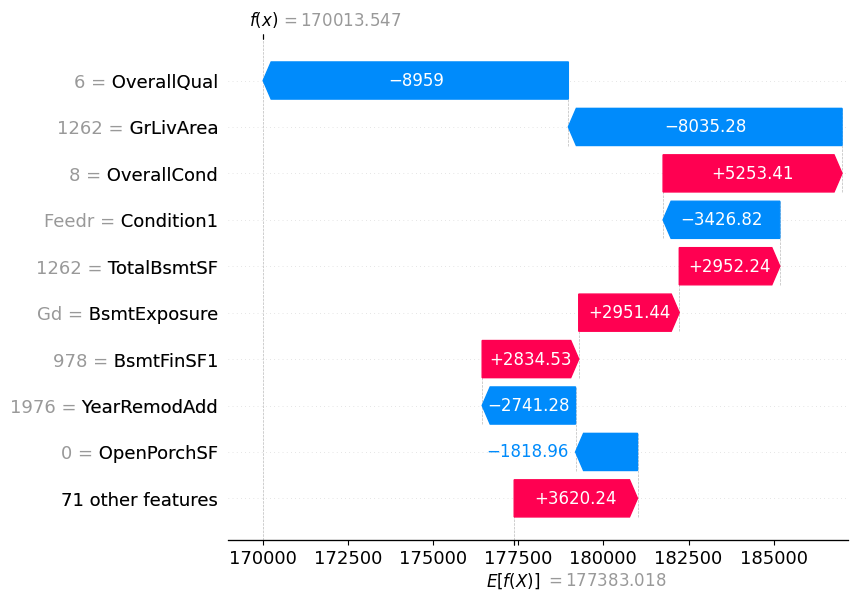

In [15]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[1]],
    display_rows=True,
    plot='waterfall'
)